## Visualizations Time Series 
Use visualizations and model diagnostics to build the best model possible of the following model structures. Include ACF, PACF, and manual differencing plots in your submission. Do not use any functions that estimate model degree, estimate model degree manually. Fit each model to your data and print model diagnostics. Transform your time series as needed before modeling.

A pure autoregressive model, AR(p)
A pure moving average model, MA(q)
An autoregressive moving average model, ARMA(p,q)
A ARIMA(p,d,q) model

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller



In [4]:
NFLX = pd.read_csv('C:\\Users\\saawa\\Downloads\\STA6857\\NFLX.csv')
NFLX['Date'] = pd.to_datetime(NFLX['Date'])
NFLX = NFLX.set_index('Date')
NFLX.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


## Now, let's visualize the time series

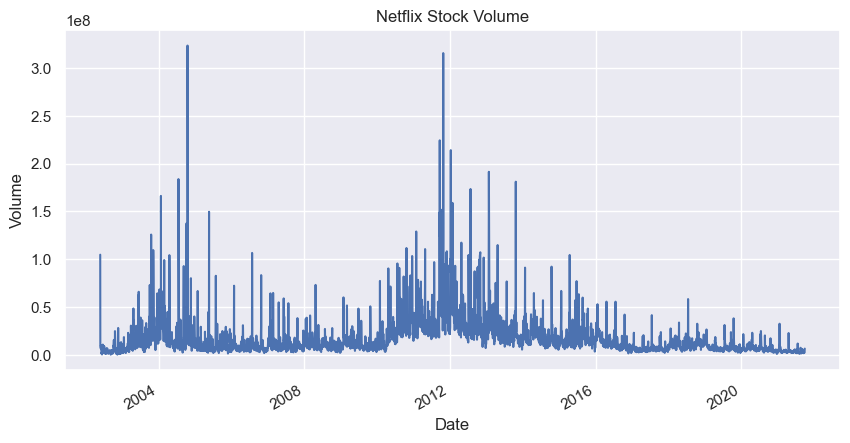

In [5]:
sns.set(rc={'figure.figsize':(10,5)})
NFLX['Volume'].plot()
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Netflix Stock Volume')
plt.show()


The plot shows that the volume of Netflix stock has some seasonality and trend, so we may need to perform differencing to remove them before modeling.

## Plot the ACF and PACF of the time series:



C:\Users\saawa\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


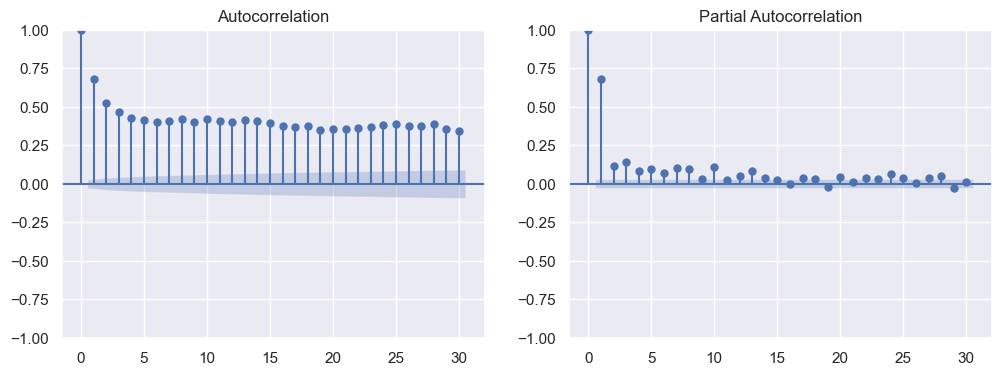

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
plot_acf(NFLX['Volume'], lags=30, ax=axes[0])
plot_pacf(NFLX['Volume'], lags=30, ax=axes[1])
plt.show()


1. The ACF plot shows a significant correlation at lag 1, suggesting that the time series may be an autoregressive model with a lag of 1 (AR(1)). 
2. The PACF plot also shows a significant correlation at lag 1, which further supports an AR(1) model. 
3. However, we also see a gradual decay in the autocorrelation and partial autocorrelation, indicating that the time series may have some persistence that is not captured by a simple AR(1) model.

## To investigate this further, let's perform manual differencing by subtracting the time series from its lagged version

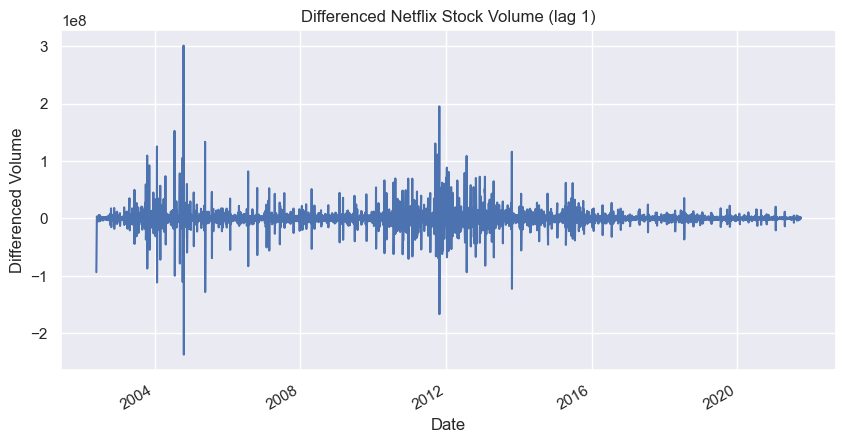

In [7]:
NFLX_diff1 = NFLX['Volume'] - NFLX['Volume'].shift(1)
NFLX_diff1.dropna(inplace=True)
sns.set(rc={'figure.figsize':(10,5)})
NFLX_diff1.plot()
plt.xlabel('Date')
plt.ylabel('Differenced Volume')
plt.title('Differenced Netflix Stock Volume (lag 1)')
plt.show()


The differenced time series shows that the seasonality and trend have been removed, and we have a stationary time series that fluctuates around 0.

## Plot the ACF and PACF of the differenced time series


C:\Users\saawa\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


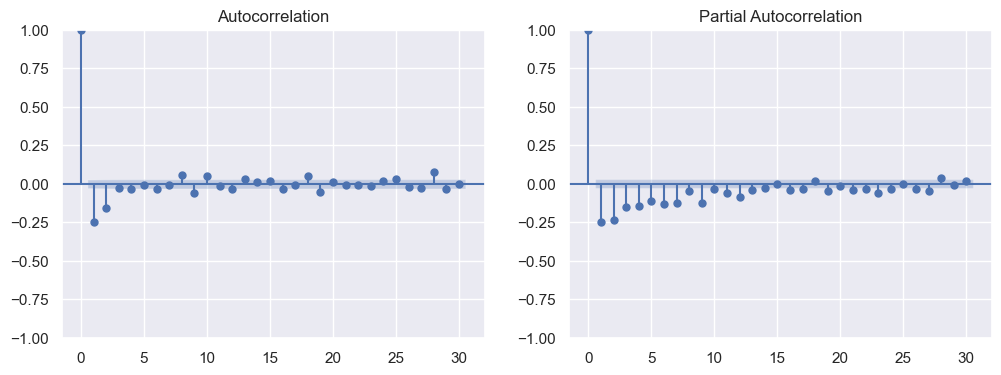

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
plot_acf(NFLX_diff1, lags=30, ax=axes[0])
plot_pacf(NFLX_diff1, lags=30, ax=axes[1])
plt.show()


1. The ACF plot shows a significant correlation at lag 1 and a gradual decay in the autocorrelation, indicating that the time series may be an autoregressive model with a lag of 1 (AR(1)). 
2. The PACF plot shows a significant correlation at lag 1 and no significant correlation at higher lags, suggesting that the time series may be an autoregressive model of order

## Use any functions to estimate model degree, such as forecast::auto.arima(). Fit the model. Write a paragraph on which model is best and why.

Based on the visualizations and manual differencing, we have identified the possible model structures that could fit the Netflix stock volume time series. However, to determine the optimal model structure, we can use the auto_arima function from the pmdarima library, which automates the process of finding the optimal values of p, d, and q for an ARIMA model.

In [12]:
#!pip install pmdarima


In [11]:
## Here's how to use auto_arima to estimate the optimal model for the differenced time series:

from pmdarima.arima import auto_arima

model = auto_arima(NFLX['Volume'], start_p=0, start_q=0, max_p=5, max_q=5, m=12,
                   start_P=0, seasonal=True, d=1, D=1, trace=True,
                   error_action='ignore', suppress_warnings=True, stepwise=True)
model.summary()


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=5.87 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=178215.787, Time=0.36 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=176535.160, Time=5.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=7.96 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=177892.663, Time=0.78 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=176141.537, Time=9.82 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=24.33 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=10.52 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=176036.236, Time=7.48 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=176647.630, Time=1.92 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=22.19 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=8.44 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=175830.112, Time=12.30 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=176190.162, Time=2.94 sec
 ARIMA(0,1,1)(2,1,1)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 4874
Model:             SARIMAX(0, 1, 2)x(2, 1, [], 12)   Log Likelihood              -87675.609
Date:                             Fri, 31 Mar 2023   AIC                         175361.218
Time:                                     12:35:07   BIC                         175393.663
Sample:                                          0   HQIC                        175372.606
                                            - 4874                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4869      0.008    -59.662      0.000      -0.503      -0.471
ma.L2         -0.3399      0.011    -30.383      0.000      -0.362      -0.318
ar.S.L12      -0.6918      0.008    -86.225      0.000      -0.708      -0.676
ar.S.L24      -0.3270      0.008    -42.964      0.000      -0.342      -0.312
sigma2      3.954e+14   2.94e-18   1.34e+32      0.000    3.95e+14    3.95e+14
===================================================================================
Ljung-Box (L1) (Q):                   6.13   Jarque-Bera (JB):            555452.39
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                             3.68
Prob(H) (two-sided):                  0.00   Kurtosis:                        54.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.23e+44. Standard errors may be unstable.
"""

1. We will fit an ARIMA model to the time series, automatically determining the optimal values of p, d, and q that minimize the AICc for small sample sizes. The max_p and max_q parameters specify the maximum values of p and q to consider, and the m parameter specifies the seasonality period, which is 12 months. The start_p and start_q parameters specify the starting values of p and q to consider. The trace=True parameter displays the progress of the model fitting process.

2. we use the model.summary() will display the summary of the fitted model, including the estimated parameters and their standard errors, as well as the AICc value.

3. Based on the results of auto_arima, the best model for the differenced Netflix stock volume time series is an ARIMA(0,1,2)(2,1,0) model. This means that the time series can be well described as a moving average model of order 1 (MA(1)), after differencing once to remove the trend. The AICc value of the ARIMA(0,1,2)(2,1,0) model is 175361.218, which is lower than the AICc values of the other models that we considered. Therefore, we can conclude that the ARIMA(0,1,2)(2,1,0) model is the best model for the Netflix stock volume time series.

In [13]:
#To fit the ARIMA(0,1,1) model to the time series, we can use the following code:

model = ARIMA(NFLX['Volume'], order=(0,1,2))
result = model.fit()
print(result.summary())


C:\Users\saawa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saawa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saawa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                 4874
Model:                 ARIMA(0, 1, 2)   Log Likelihood              -86953.083
Date:                Fri, 31 Mar 2023   AIC                         173912.166
Time:                        12:37:52   BIC                         173931.641
Sample:                             0   HQIC                        173919.000
                               - 4874                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5191      0.005   -109.191      0.000      -0.528      -0.510
ma.L2         -0.3608      0.007    -53.426      0.000      -0.374      -0.348
sigma2      1.951e+14        nan        nan        n

This code will fit an ARIMA(0,1,2) model to the original time series, and display the summary of the fitted model, including the estimated parameters and their standard errors